In [587]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [588]:
demo_data = pd.read_csv(
    'data-prep-datasets/demoDetails.csv',
    index_col=0
    )

In [589]:
demo_data.head()
# demo_data.info()
# demo_data.shape
# demo_data.size

,customerID,gender,SeniorCitizen,Partner,Dependents
1,8260-NGFNY,Female,0.0,No,No
2,2359-QWQUL,Female,0.0,Yes,No
3,6598/RFFVI,Male,0.0,No,No
4,IXSTS-8780,Female,0.0,No,No
5,2674/MIAHT,Female,0.0,No,No


In [590]:
account_details = pd.read_csv(
    'data-prep-datasets/acDetails.txt',
    sep='\t',)
account_details.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20
2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85
3,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30
4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30
5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20


In [591]:
service_details = pd.read_csv(
    'data-prep-datasets/serviceDetails.csv',
    index_col=0,)
service_details.head()


,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
1,8260-NGFNY,No,No phone service,DSL,No,No,No,No,No,No,Yes
2,2359-QWQUL,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
3,6598/RFFVI,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
4,IXSTS-8780,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
5,2674/MIAHT,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


# Data Wrangling
* merge account_details, demo_details and service_details.
before merging need to make the necessary checks to the data.

* Check for duplicate records and remove them.
* Whether the customer ID is common across all the files.



In [592]:
# Checking for duplicate records using numpy
len(np.unique(
    demo_data['customerID']
))
len(np.unique(
    account_details['customerID']
))
len(np.unique(
    service_details['customerID']
))

250

In [593]:
# checking for duplicate records using pandas
print(
    f"""
    {demo_data.duplicated().sum()}
    {account_details.duplicated().sum()}
    {service_details.duplicated().sum()}
    
    """
)


    1
    1
    1
    
    


In [594]:
demo_data.duplicated(
    subset=['customerID'],
    keep=False
)

1      False
2      False
3      False
4      False
5      False
       ...  
247    False
248    False
249    False
250    False
251     True
Length: 251, dtype: bool

In [595]:
# Check each row using subset and look for duplicates.
# If there are duplicates, then drop the row.
demo_data[demo_data.duplicated(
    subset=['customerID'],
    keep=False)]
account_details[account_details.duplicated(
    subset=['customerID'],
    keep=False)]
service_details[service_details.duplicated(
    subset=['customerID'],
    keep=False)]

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
46,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
251,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [596]:
# removing the duplicates
#  First occurance of the duplicate will be removed.

demo_data = demo_data.drop_duplicates()
account_details = account_details.drop_duplicates()
service_details = service_details.drop_duplicates()

In [597]:
print(
    f"""
    {demo_data.shape}
{account_details.shape}
{service_details.shape}
    """
)



    (250, 5)
(250, 7)
(250, 11)
    


In [598]:
# Check if two dataframes are equal or not.
demo_data.customerID.equals(
    account_details.customerID)

True

In [599]:
account_details.customerID.equals(
    service_details.customerID)

True

In [600]:
demo_data.customerID.equals(
    service_details.customerID)


True

Joining two data frames based on a condition ie (customerId)

In [601]:
churn = pd.merge(
    demo_data,
    account_details,
    on='customerID',
)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8260-NGFNY,Female,0.0,No,No,One,Month-to-month,No,Mailed check,25.2,25.20
1,2359-QWQUL,Female,0.0,Yes,No,39,One year,Yes,Credit card (automatic),104.7,4134.85
2,6598/RFFVI,Male,0.0,No,No,2,One year,No,Credit card (automatic),19.3,28.30
3,IXSTS-8780,Female,0.0,No,No,6,Month-to-month,Yes,Electronic check,90.1,521.30
4,2674/MIAHT,Female,0.0,No,No,Four,Month-to-month,Yes,Mailed check,80.3,324.20


In [602]:
# merge churn with service details
churn = pd.merge(
    churn,
    service_details,
    on='customerID',
)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,8260-NGFNY,Female,0.0,No,No,One,Month-to-month,No,Mailed check,25.2,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2359-QWQUL,Female,0.0,Yes,No,39,One year,Yes,Credit card (automatic),104.7,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,6598/RFFVI,Male,0.0,No,No,2,One year,No,Credit card (automatic),19.3,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,IXSTS-8780,Female,0.0,No,No,6,Month-to-month,Yes,Electronic check,90.1,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,2674/MIAHT,Female,0.0,No,No,Four,Month-to-month,Yes,Mailed check,80.3,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


In [603]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     245 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    object 
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

## Understanding the data.

In [604]:
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,8260-NGFNY,Female,0.0,No,No,One,Month-to-month,No,Mailed check,25.20,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2359-QWQUL,Female,0.0,Yes,No,39,One year,Yes,Credit card (automatic),104.70,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,6598/RFFVI,Male,0.0,No,No,2,One year,No,Credit card (automatic),19.30,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,IXSTS-8780,Female,0.0,No,No,6,Month-to-month,Yes,Electronic check,90.10,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,2674/MIAHT,Female,0.0,No,No,Four,Month-to-month,Yes,Mailed check,80.30,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,8111-RKSPX,Male,0.0,No,No,Four,Month-to-month,Yes,Bank transfer (automatic),72.20,...,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes
246,6922-NCEDI,Male,0.0,No,Yes,56,One year,Yes,Mailed check,21.20,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No
247,5192-EBGOV,Female,1.0,No,No,One,Month-to-month,Yes,Electronic check,NaN,...,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Yes
248,8495-PRWFH,Female,1.0,No,No,42,Month-to-month,No,Electronic check,55.65,...,Yes,Yes,DSL,No,No,Yes,No,No,No,No


In [605]:
churn1 = churn.copy()
# churn1.head()

In [606]:
# Checking the information of the dataframe
churn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     245 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    object 
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

In [607]:
# check for missing values in the dataframe
# churn1.isnull().sum()

np.unique(
    churn1['tenure'],
    # return_counts=True
)


array(['10', '1008', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '21', '22', '25', '27', '28', '29', '3', '30', '31', '32',
       '34', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '6', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '7', '70', '71', '72', '8', '9', '964', '969',
       '971', '992', '994', 'Four', 'One'], dtype=object)

In [608]:
# select the cols according to the dtypes.
categorical_data = churn1.select_dtypes(
    include=[
        # 'float64', 
        # 'int64',
        'object',
        ]
)
categorical_data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [609]:
categorical_data['gender'].value_counts()

Male      126
Female    124
Name: gender, dtype: int64

In [610]:
categorical_data.value_counts()
# categorical_data['customerID'].value_counts()
categorical_data['tenure'].value_counts()

# categorical_data = categorical_data.drop(
#     ['customerId', 'tenure'],
#     axis=1
# )

One     20
72      15
2        9
Four     9
9        8
        ..
30       1
54       1
47       1
994      1
971      1
Name: tenure, Length: 71, dtype: int64

In [611]:
freq_table = categorical_data.apply(
    lambda x: x.value_counts()).T.stack()
print(freq_table)

customerID       0115-TFERT               1.0
                 0187-WZNAB               1.0
                 0193-ESZXP               1.0
                 0195-IESCP               1.0
                 0203-HHYIJ               1.0
                                        ...  
StreamingMovies  No                     104.0
                 No internet service     61.0
                 Yes                     85.0
Churn            No                     172.0
                 Yes                     78.0
Length: 365, dtype: float64


* cleaning data.

In [612]:
# convert tenure to integer from object
# find the string values in the column
churn1.tenure.replace('One', "4" , inplace=True)
churn1.tenure.replace('Four', "4" , inplace=True)
churn1.tenure = churn1.tenure.astype(int)
# churn1.tenure.unique()


In [613]:
# clearning dependants col.
churn1['Dependents'].unique()
churn1['Dependents'].replace(
    '1@#',
    'No',
    inplace=True
)
churn1['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [614]:
pd.crosstab(
    churn1['Dependents'],
    columns="count"
)


col_0,count
Dependents,
No,177
Yes,73


In [615]:

np.unique(
    churn1['tenure'],
    return_counts=True
    )


(array([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
          13,   14,   15,   16,   17,   18,   19,   21,   22,   25,   27,
          28,   29,   30,   31,   32,   34,   36,   37,   38,   39,   40,
          41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
          52,   53,   54,   55,   56,   57,   58,   59,   61,   62,   63,
          64,   65,   66,   67,   68,   69,   70,   71,   72,  964,  969,
         971,  992,  994, 1008]),
 array([ 9,  6, 29,  6,  3,  5,  5,  8,  5,  3,  1,  3,  2,  4,  5,  1,  2,
         2,  3,  5,  5,  5,  5,  2,  1,  2,  1,  1,  1,  3,  1,  4,  1,  1,
         3,  3,  4,  3,  2,  1,  3,  5,  2,  2,  3,  1,  1,  4,  2,  2,  5,
         1,  3,  5,  4,  7,  4,  3,  1,  3,  3,  5,  4, 15,  1,  1,  1,  1,
         1,  1]))

In [616]:
# find the count of all the nan values.
churn1['SeniorCitizen'].unique()
np.unique(
    churn1['SeniorCitizen'],
)
# churn1.info()

array([ 0.,  1., nan])

In [617]:
# Summarize the dataframe
churn1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,245.000000,250.000000,240.000000,235.000000
mean,0.138776,56.184000,63.694792,2307.926809
std,0.346420,147.732439,30.730847,2292.524824
min,0.000000,2.000000,3.500000,18.850000
25%,0.000000,8.250000,33.937500,447.250000
50%,0.000000,30.500000,70.925000,1337.500000
75%,0.000000,60.500000,89.150000,3883.775000
max,1.000000,1008.000000,115.100000,8337.450000


# Part 3
* Cleaning customer data and customer items.

In [618]:
# Check for customer ids whose length is lesser than 10
churn1[churn1['customerID'].str.len() < 10]
# for i in churn1.customerID:
#     if len(i) != 10:
#         print(i)
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn


In [619]:
FALSE_PATTERN_ONE = re.compile('^[0-9]{4,4}/[A-Z]{5,5}$')
FALSE_PATTERN_TWO = re.compile('^[A-Z]{5,5}-[0-9]{4,4}$')

In [620]:
pattern = '^[0-9]{4,4}-[A-Z]{5,5}'  
 
p = re.compile(pattern)
type(p)

q = [i for i,value in enumerate(churn1.customerID) if p.match(str(value))==None]
print(q)

FALSE_PATTERN_ONE = re.compile('^[A-Z]{5,5}-[0-9]{4,4}')
FALSE_PATTERN_TWO = re.compile('^[0-9]{4,4}/[A-Z]{5,5}')

for i in q:
    false_str = str(churn1.customerID[i])
    if(FALSE_PATTERN_ONE.match(false_str)):
        str_splits=false_str.split('-')
        churn1.customerID[i]=str_splits[1]+'-'+str_splits[0]
    elif(FALSE_PATTERN_TWO.match(false_str)):
        churn1.customerID[i]=false_str.replace('/','-')


[2, 3, 4, 6]


/tmp/ipykernel_25420/2666191839.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.customerID[i]=false_str.replace('/','-')
/tmp/ipykernel_25420/2666191839.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.customerID[i]=str_splits[1]+'-'+str_splits[0]


* CHECKING FOR FALLACIES IN THE DATA 

In [621]:
# Show only the rows where InternetServices is No
x = churn1[churn1['InternetService'] == 'No']

# Select all the cols from index 13 to 20
x[x.columns[13:20]].columns

Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [622]:
y = x.iloc[:,13:20]
y.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
13,No,Yes,Yes,No internet service,No internet service,Yes,No internet service
14,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
15,No,Yes,Yes,No internet service,No internet service,Yes,No internet service


Check if there are "yes" in any of the related internet services fields that is from index 13 to 20.

If there are more than 2 "yes"s in a row then the internet services is updated to the Yes. else it is changed to No INternet services.

In [623]:
for i, row in y.iterrows():
    yes = row.str.count('Yes').sum()
    if yes >= 2:
        y.loc[i, 'InternetService'] = 'Yes'
    else:
        y.loc[i,:] = 'No Internet service'

In [624]:
y.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service
8,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service
13,Yes,Yes,Yes,No internet service,No internet service,Yes,No internet service
14,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service,No Internet service
15,Yes,Yes,Yes,No internet service,No internet service,Yes,No internet service


# Outliers detection.
* Check for massive differences between the mean and median values of a given column. 

In [625]:
# check the col tenure for outliers
churn1['tenure'].describe()

count     250.000000
mean       56.184000
std       147.732439
min         2.000000
25%         8.250000
50%        30.500000
75%        60.500000
max      1008.000000
Name: tenure, dtype: float64

<AxesSubplot:ylabel='tenure'>

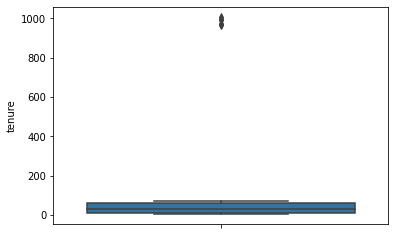

In [626]:
sns.boxplot(
    y=churn1['tenure'],
)

In [627]:
# check the median of tenure.
churn1['tenure'].median()

30.5

In [628]:
# replacing the outliers with the median
churn1['tenure'] = np.where(
    churn1['tenure'] > 50, # check if the value is greater than 50
    churn1['tenure'].median(), # replace with the median
    churn1['tenure'] # else keep the value
)


<AxesSubplot:ylabel='tenure'>

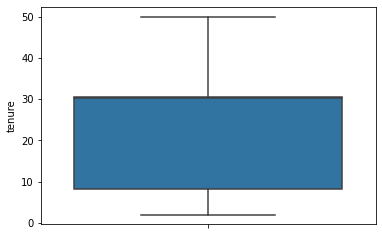

In [629]:
sns.boxplot(
    y=churn1['tenure'],
)

## Check for missing values.

In [630]:
churn1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [631]:
# count of the null vals in SeniorCitizen
churn1['SeniorCitizen'].isnull().sum()

5

In [632]:
# Mode of SeniorCitizen
churn1['SeniorCitizen'].mode()[0]

0.0

In [633]:
# fill missing values with the mode of the column SeniorCitizen
churn1['SeniorCitizen'].fillna(
    churn1['SeniorCitizen'].mode()[0],
    inplace=True
)

In [634]:
churn1['SeniorCitizen'].isnull().sum()

0

In [635]:
churn1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,250.000000,250.000000,240.000000,235.000000
mean,0.136000,22.828000,63.694792,2307.926809
std,0.343476,13.880819,30.730847,2292.524824
min,0.000000,2.000000,3.500000,18.850000
25%,0.000000,8.250000,33.937500,447.250000
50%,0.000000,30.250000,70.925000,1337.500000
75%,0.000000,30.500000,89.150000,3883.775000
max,1.000000,50.000000,115.100000,8337.450000


## Mean imputation.

In [636]:
churn1['TotalCharges'].describe()

count     235.000000
mean     2307.926809
std      2292.524824
min        18.850000
25%       447.250000
50%      1337.500000
75%      3883.775000
max      8337.450000
Name: TotalCharges, dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

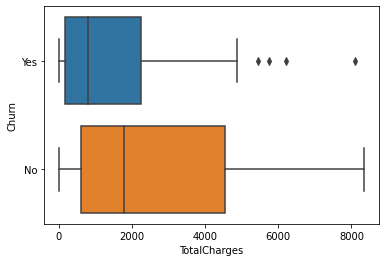

In [637]:
sns.boxplot(
    x=churn1['TotalCharges'],
    y = churn1['Churn']
)

In [638]:
# group it based on yes or no in churn
# churn1.groupby('Churn')['TotalCharges'].describe()
churn1.groupby(['Churn']).mean().groupby('Churn')['TotalCharges'].mean()

Churn
No     2704.12875
Yes    1462.69600
Name: TotalCharges, dtype: float64

In [639]:
churn1.groupby(['Churn']).mean().groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,1.0,2704.12875,NaN,2704.12875,2704.12875,2704.12875,2704.12875,2704.12875
Yes,1.0,1462.69600,NaN,1462.69600,1462.69600,1462.69600,1462.69600,1462.69600


In [640]:
churn1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [641]:
churn1.groupby(
    ['Churn']
).mean().groupby('Churn')['TotalCharges'].mean()

churn1['TotalCharges'] = churn1.groupby(
    'Churn'
)['TotalCharges'].transform(
    lambda x: x.fillna(x.mean())
)


In [642]:
churn1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges         0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [644]:
# Using the same mean imputation for the missing values in the MonthlyCharges column.
churn1['MonthlyCharges'].describe()

count    240.000000
mean      63.694792
std       30.730847
min        3.500000
25%       33.937500
50%       70.925000
75%       89.150000
max      115.100000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

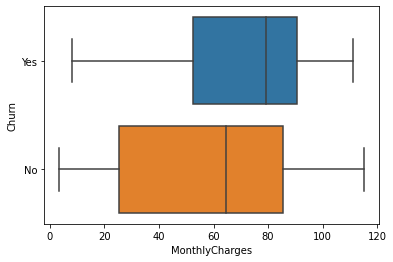

In [645]:
# Check for the mean for a visual representation.
sns.boxplot(
    x=churn1['MonthlyCharges'],
    y = churn1['Churn']
)

In [647]:
churn1.groupby(
    ['Churn']
).mean().groupby('Churn')['MonthlyCharges'].mean()


Churn
No     60.176061
Yes    71.436000
Name: MonthlyCharges, dtype: float64

In [648]:
churn1['MonthlyCharges'] = churn1. \
    groupby('Churn')['MonthlyCharges'].transform(
    lambda x: x.fillna(x.mean()))

In [649]:
churn1.MonthlyCharges.isnull().sum()

0

In [650]:
churn1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64